# Сборный проект - 1

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Откроем файл с данными и изучим общую информацию

In [1]:
#Импортируем библиотеки.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

In [2]:
#Считываем данные из csv-файла в датафрейм
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
#Выведем первые 10 строчек датафрейма data на экран
pd.set_option('display.max_columns', None)
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Выведите основную информацию о датафрейме с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#Посмотрим, в каких столбцах есть пропуски
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#посмотрим долю пропусков, и на основании этого примем решение о удалении, замене либо игнорировании пропусков
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [7]:
#Выведем статистику
display(data.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Вывод

Необходимо подготовить данные, так как есть некорректные значения.

In [8]:
# def название функции (df):
#   '''Функция получения первичной информации о датафрейме'''
#   print ('------------- Первые 5 строк ------------')
#   display(df.head())
#   print('')
#   print('')
#   print ('------------- Типы данных ------------')
#   print (df.info())
#   print('')
#   print('')
#   print ('------------- Пропуски ------------')
#   count = 0
#   for element in df.columns:
#     if df[element].isna().sum() > 0: 
#       print(element, ' - ', df[element].isna().sum(), 'пропусков')
#       count = +1
#   if count == 0:
#     print('Пропусков НЕТ')
#   print('')
#   print('')
#   print ('------------- Дубликаты ------------')
#   if df.duplicated().sum() > 0:
#     print('Дубликатов: ', df.duplicated().sum())
#   else:
#     print('Дубликатов НЕТ')

In [9]:
#название функции(датасет)

## Подготовим данные


- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [10]:
#Приведем к нижнему регистру названия столбцов
data.columns = map(str.lower, data.columns)

In [11]:
#Значения в столбце 'year_of_release' вещественные числа
#С помощью метода astype() превратим содержимое этого столбца в целый тип данных, так как в годах дробей быть не может
#Для этого сначала удалим строки с пропусками в year_of_release, 269 пропусков - это 1,6% от всех записей
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype(int)

In [12]:
#Посмотрим еще раз, в каких столбцах есть пропуски
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [13]:
#Пропуски в столбцах name и genre, посмотрим на данные строки
data[data['name'].isna()]
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#Это две одинаковые строки, удалим их
data = data.dropna(subset=['name']).reset_index(drop=True)

В столбцах critic_score пропуски заменять не будем, так как их слишком много.

In [15]:
#Заменим пустые значения rating на Unknow
data['rating'] = data['rating'].fillna(value='Unknow')

Посмотрим на значения в столбце с оценкой пользователей user_score

In [16]:
#Выведем уникальные значения
data['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

TBD - сокращение часто используется в сфере компьютерных игр. Расшифровывается - To Be Determined, то есть "Будет определено".

In [17]:
#Посмотрим количество строк с tbd
data[data['user_score'] == 'tbd']['user_score'].count()

2376

In [18]:
#2376 строк очень много, удалять нельзя. Можно предположить, что данное значение можно заменить на nan.
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan

In [19]:
#Значения в столбце 'user_score' строки
#С помощью метода astype() превратим содержимое этого столбца в вещественный тип данных
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [20]:
#Проверим уникальные значения
data['user_score'].sort_values(ascending=False).unique()

array([9.7, 9.6, 9.5, 9.4, 9.3, 9.2, 9.1, 9. , 8.9, 8.8, 8.7, 8.6, 8.5,
       8.4, 8.3, 8.2, 8.1, 8. , 7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7.3, 7.2,
       7.1, 7. , 6.9, 6.8, 6.7, 6.6, 6.5, 6.4, 6.3, 6.2, 6.1, 6. , 5.9,
       5.8, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5. , 4.9, 4.8, 4.7, 4.6,
       4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3,
       3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2. ,
       1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.7, 0.6,
       0.5, 0.3, 0.2, 0. , nan])

In [21]:
#Добавим новый столбец с суммарными продажами во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [22]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknow,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknow,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknow,28.31


In [23]:
#Проверим на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов нет

### Вывод

Заменили названия столбцов, привели к нижнему регистру. 

Преобразовали данные в столбцах year_of_release и user_score в нужные типы данных. 

Удалили пропуски в столбцах name и genre. В столбцах critic_score, user_score пропуски удалять/заменять не будем, так как их слишком много. Причины таких больших пропусков могут быть следующие: не обязательные поля для заполнения, отсутствие данных (не популярные игры). Заменил пропуски в столбце rating на Unknow.

Заменили в user_score аббревиатуру 'tbd' на nan. Создали новый столбец с суммарными продажами.

Проверили на явные дубликаты - не обноружили.

## Проведем исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [24]:
#Группируем таблицу по годам, для каждого находим количество
data.pivot_table(index='year_of_release', values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


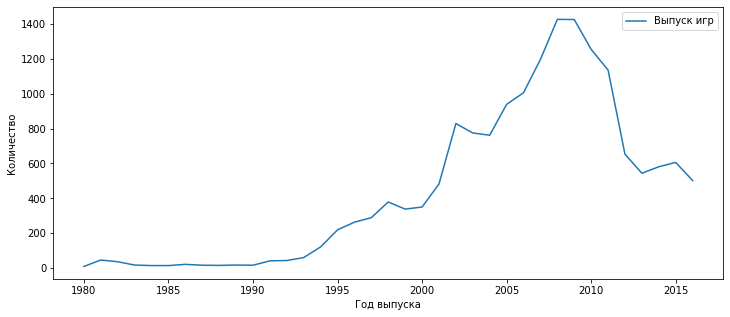

In [25]:
#Построим график
plt.figure(figsize=(12,5))
plt.plot(data.pivot_table(index='year_of_release', values='name', aggfunc='count'), label='Выпуск игр')
plt.legend()
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

До 1990 года количество игр выпускалось достаточно мало, их можно не брать в расчет. Настоящий бум наступил с 2000-х годов с развитием и доступностью компюьтеров.

In [26]:
#Дальше будем работать с данными от 1990 года
data_1990 = data.query('year_of_release > 1990')

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

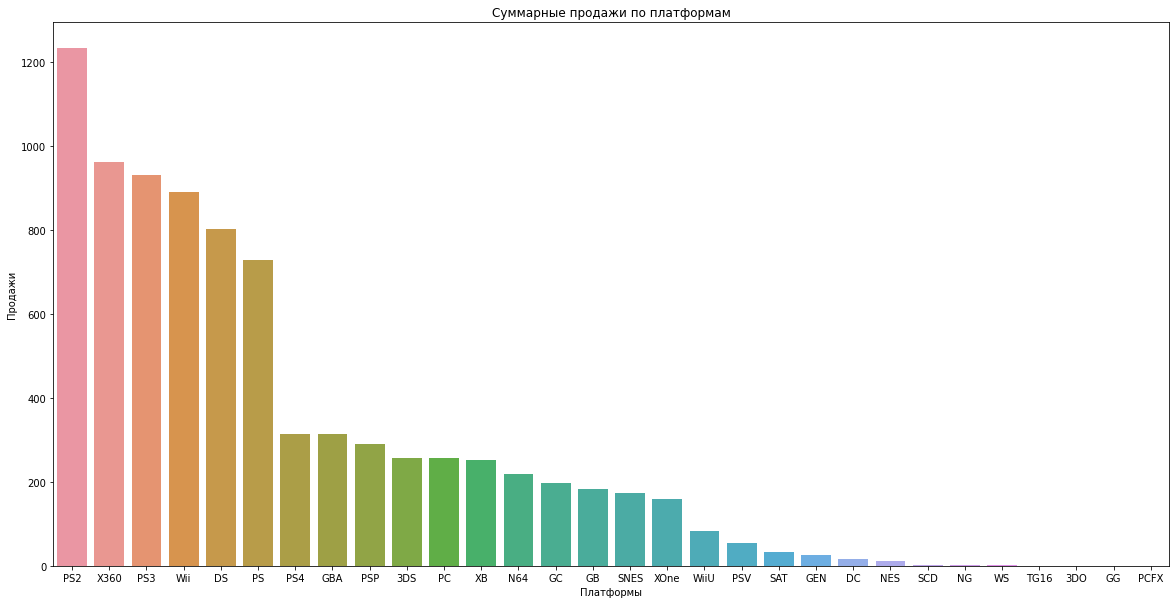

In [27]:
#Группируем таблицу по платформам, для каждой находим сумму
platform_sales_pivot = data_1990.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

#Строим гистограмму
plt.figure(figsize=(20, 10))
sns.barplot(x=platform_sales_pivot.index, y=platform_sales_pivot['total_sales'])
plt.title("Суммарные продажи по платформам")
plt.xlabel('Платформы')
plt.ylabel('Продажи')
plt.show()

In [28]:
#Отобразим в таблице
platform_sales_pivot

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Платформы с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS

In [29]:
#Выберем топ платформ
platform_sales_top_pivot = platform_sales_pivot.query('total_sales > 100').index

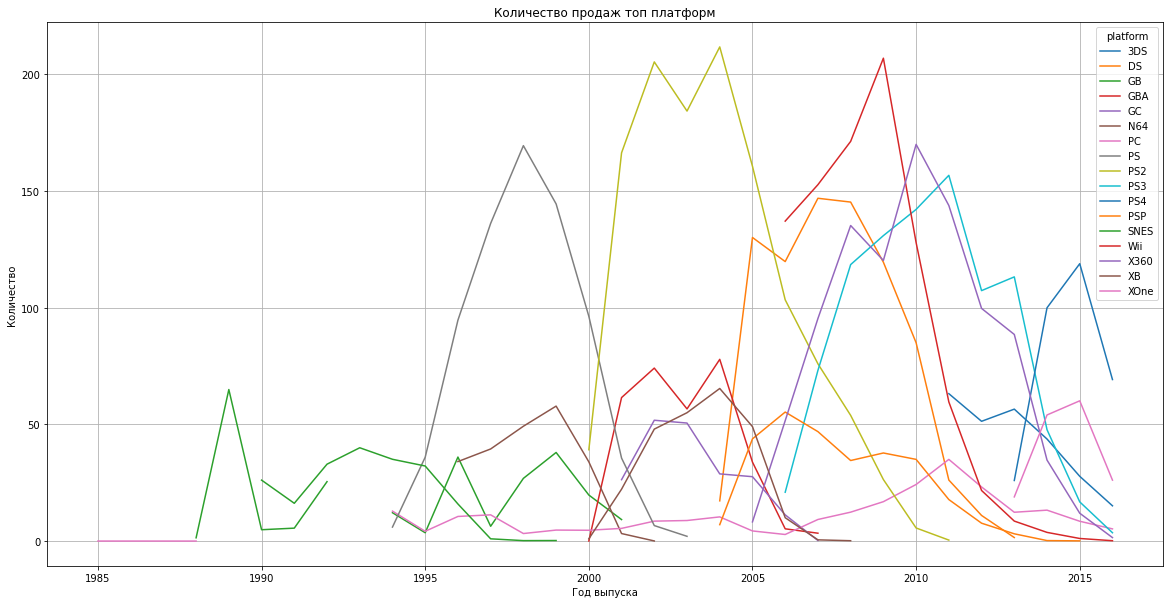

In [30]:
#Построим график топ платформ
platform_sales_pivot = data[data['platform'].isin(platform_sales_top_pivot)]
platform_sales_pivot = platform_sales_pivot.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(grid=True, figsize=(20, 10))
plt.title("Количество продаж топ платформ")
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

В среднем по графику срок жизни платформы 10-11 лет. Исключим из списка PS и PS2, так как они уже ушли в далекое прошлое и возьмем актуальный период от 2004 года.

In [31]:
#Создадим список актуальных платформ
list_top4 = ['PS4','PS3','XOne','3DS','X360']
#Сделаем выборку только с данными платформами от 2013 года
data_2013 = data[data['platform'].isin(list_top4)]
data_2013 = data_2013[(data_2013['year_of_release'] >= 2013)]

Исходя из графика выберем топ платформ PS4, PS3, XOne, 3DS, X360

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [32]:
data_2013['total_sales'].describe()

count    1473.000000
mean        0.634718
std         1.454708
min         0.010000
25%         0.050000
50%         0.170000
75%         0.580000
max        21.050000
Name: total_sales, dtype: float64

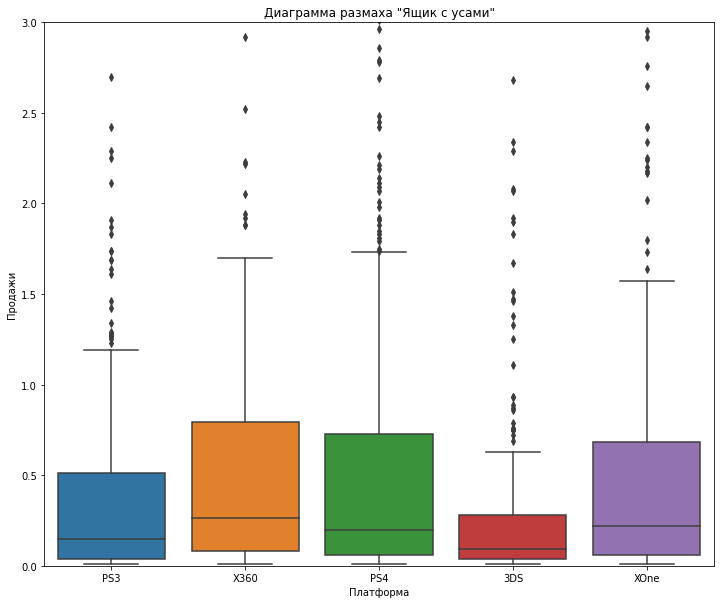

In [33]:
#Построим диаграмму размаха (график «ящик с усами»)
plt.figure(figsize=(12,10))
sns.boxplot(data=data_2013, x='platform', y='total_sales')
plt.title('Диаграмма размаха "Ящик с усами"')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0, 3)
plt.show()

Топ платформ по продажам распределились следующим образом: X360, PS4, XOne, PS3, 3DS

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [34]:
#Для расчетов возьмем самую популярную платформу X360
data_x360 = data_2013[data_2013['platform'] == 'X360']

In [35]:
#Влияние на продажи отзывов пользователей
data_x360['user_score'].corr(data_x360['total_sales'])

-0.011742185147181342

In [36]:
#Влияние на продажи отзывов критиков
data_x360['critic_score'].corr(data_x360['total_sales'])

0.3503445460228664

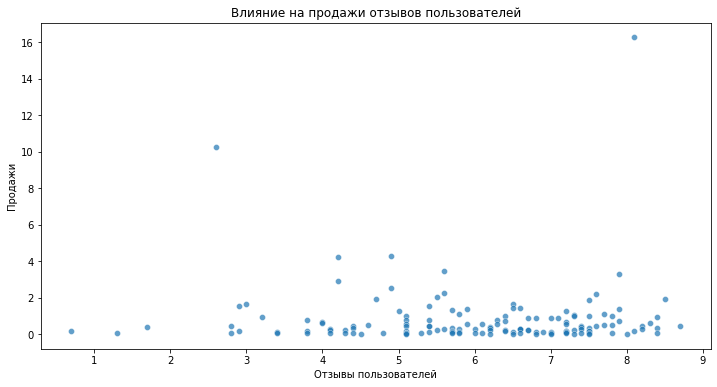

In [37]:
#Построим диаграмму рассеяния влияния на продажи отзывов пользователей
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_x360, x='user_score', y='total_sales', alpha=0.7)
plt.title('Влияние на продажи отзывов пользователей')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

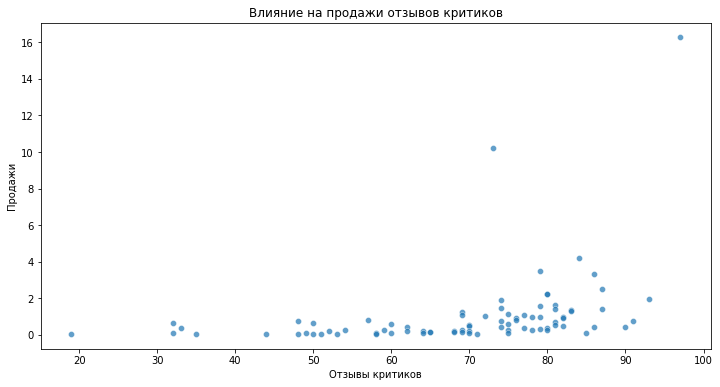

In [38]:
#Построим диаграмму рассеяния влияния на продажи отзывов критиков
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_x360, x='critic_score', y='total_sales', alpha=0.7)
plt.title('Влияние на продажи отзывов критиков')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

Влияние на продажи отзывов пользователей слабая, влияние на продажи отзывов критиков умеренная. Можно сказать, что мнение критиков намного сильнее влияет на продажи, чем отзывы обычных пользователей.

### Соотнесите выводы с продажами игр на других платформах.

In [39]:
#Напишем функциию для корреляции и построения графиков
def func_corr(name_platform):   
    data_name_platform = data_2013[data_2013['platform'] == name_platform]
    print(name_platform)
    print('Влияние на продажи отзывов пользователей ', data_name_platform['user_score'].corr(data_name_platform['total_sales']))
    print('Влияние на продажи отзывов критиков ', data_name_platform['critic_score'].corr(data_name_platform['total_sales']))
    print('\n')
    
    #Построим диаграмму рассеяния влияния на продажи отзывов пользователей
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=data_name_platform, x='user_score', y='total_sales', alpha=0.7)
    plt.title('Влияние на продажи отзывов пользователей')
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Продажи')
    plt.show()
    
    #Построим диаграмму рассеяния влияния на продажи отзывов критиков
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=data_name_platform, x='critic_score', y='total_sales', alpha=0.7)
    plt.title('Влияние на продажи отзывов критиков')
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Продажи')
    plt.show()

PS4
Влияние на продажи отзывов пользователей  -0.031957110204556376
Влияние на продажи отзывов критиков  0.40656790206178095




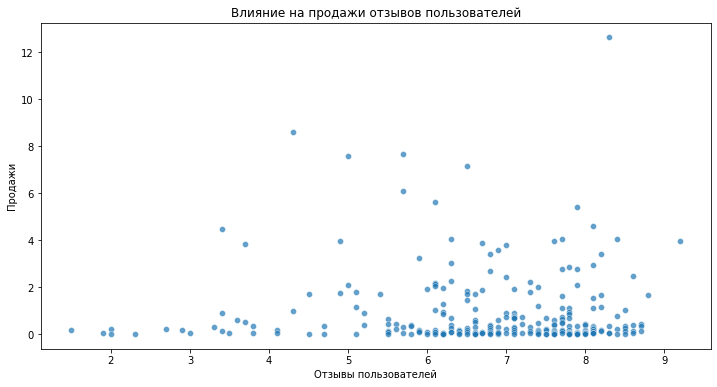

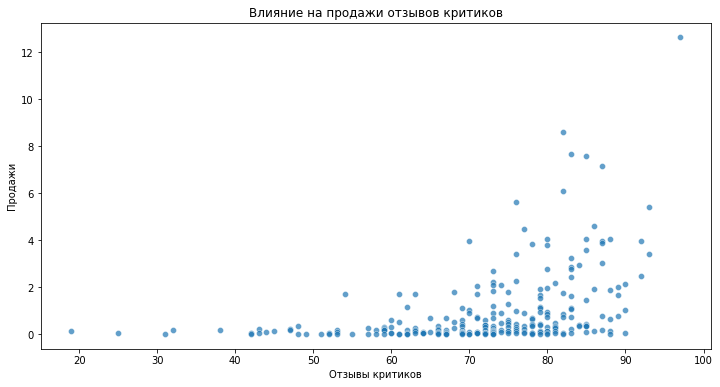

PS3
Влияние на продажи отзывов пользователей  0.0023944027357566925
Влияние на продажи отзывов критиков  0.3342853393371919




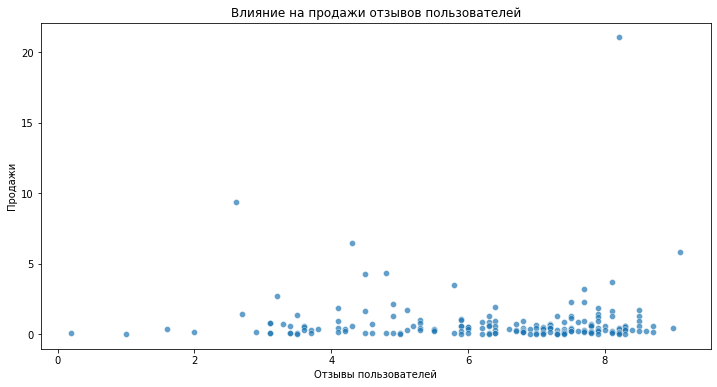

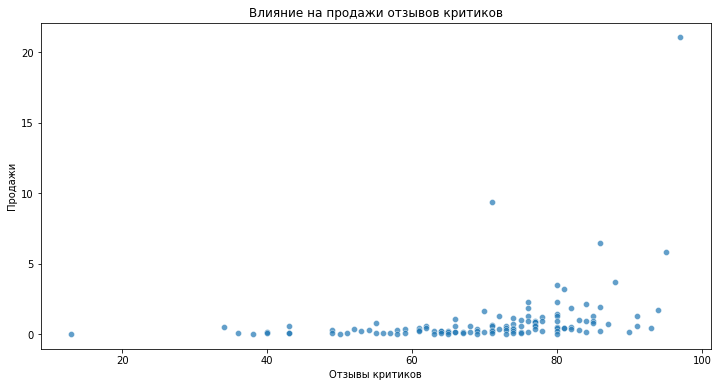

XOne
Влияние на продажи отзывов пользователей  -0.06892505328279414
Влияние на продажи отзывов критиков  0.4169983280084017




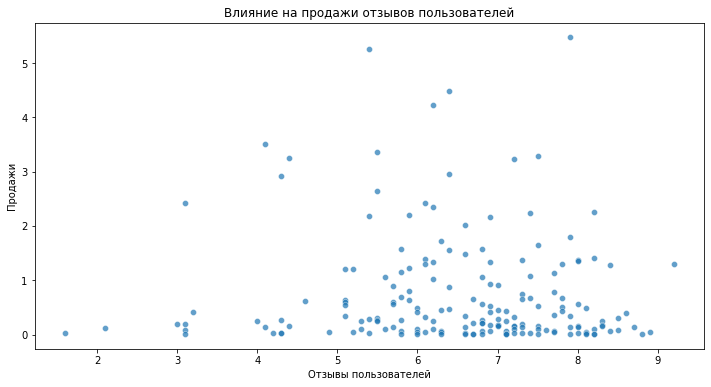

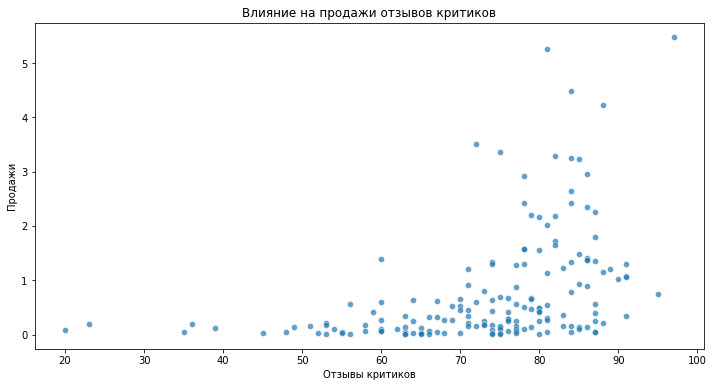

3DS
Влияние на продажи отзывов пользователей  0.24150411773563016
Влияние на продажи отзывов критиков  0.3570566142288103




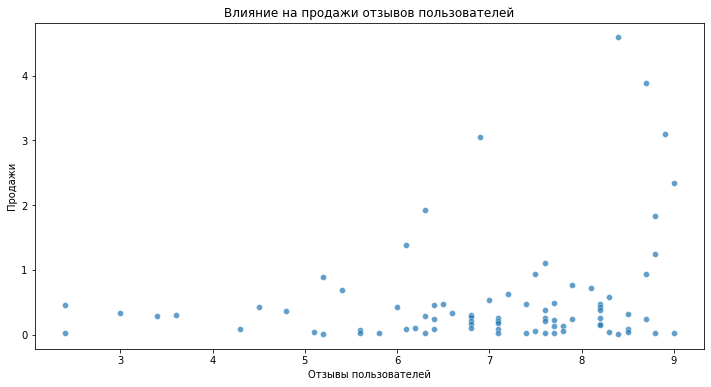

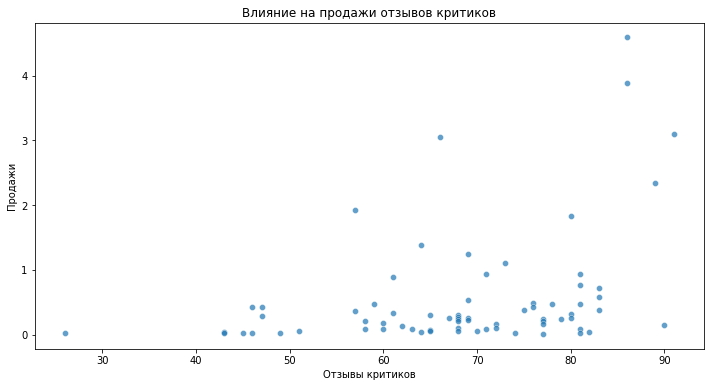

In [40]:
#Выведем для оставшихся из топа платформ
for name_pl in ['PS4','PS3','XOne','3DS']:
    func_corr(name_pl)    

По другим платформам ситуация немного отличается, но общий вывод такой же, критики влияют сильнее. Исключением выглядет XOne, влияние отзывов пользователей выглядет довольно странно.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [41]:
#Группируем таблицу по жанрам, и посчитаем количество
platform_sales_pivot = data_2013.pivot_table(index='genre', values = 'total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False)
platform_sales_pivot

,total_sales
genre,
Action,521
Role-Playing,184
Sports,170
Shooter,145
Adventure,110
Misc,98
Racing,64
Fighting,63
Platform,47


In [42]:
#Группируем таблицу по жанрам, и посчитаем сумму
platform_genre_pivot = data_2013.pivot_table(index='genre', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_genre_pivot

,total_sales
genre,
Action,285.96
Shooter,216.22
Sports,142.48
Role-Playing,127.83
Misc,43.57
Racing,31.46
Fighting,27.91
Platform,22.88
Adventure,18.59


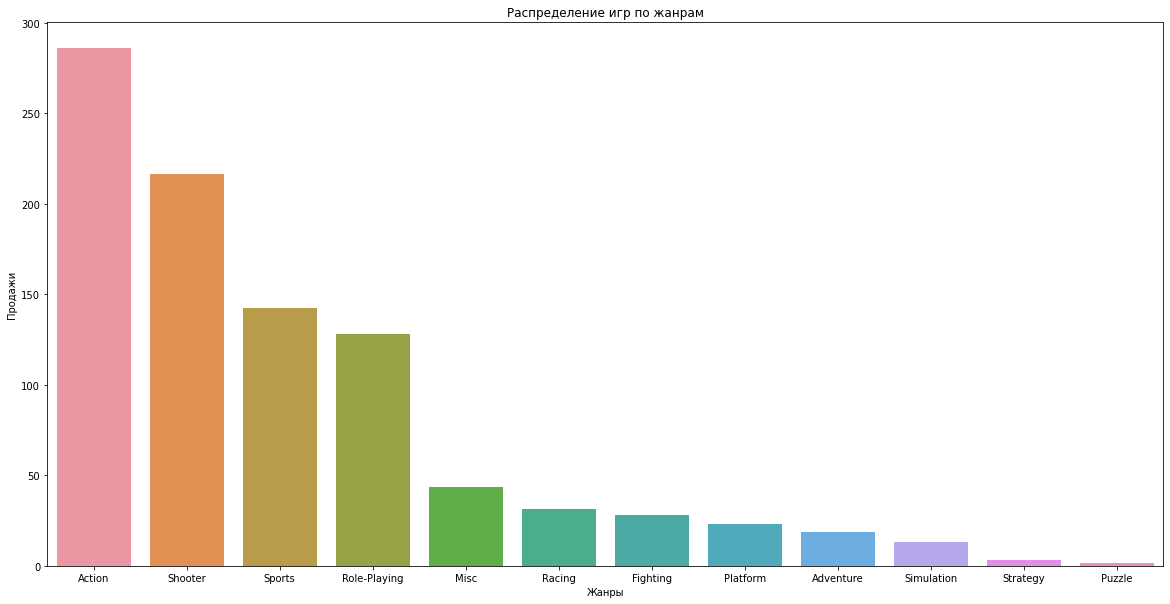

In [43]:
#Построим гистограмму
plt.figure(figsize=(20, 10))
sns.barplot(x=platform_genre_pivot.index, y=platform_genre_pivot['total_sales'])
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

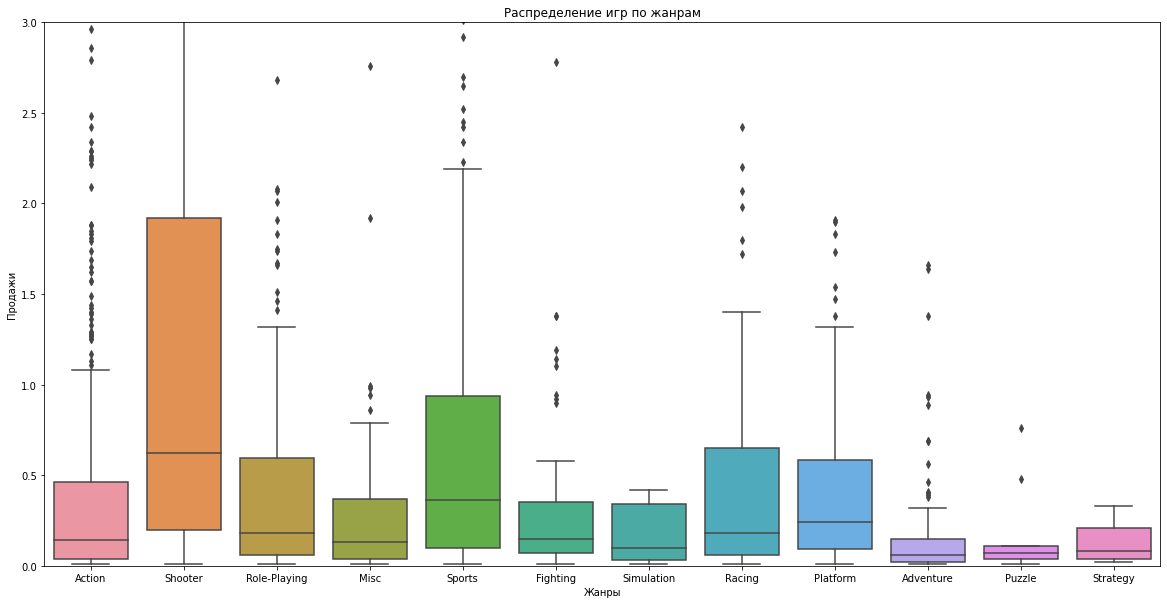

In [44]:
#Построим диграмму размаха
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_2013, x='genre', y='total_sales')
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.ylim(0, 3)
plt.show()

In [45]:
#Группируем таблицу по жанрам, и посчитаем средние и медианные продажи
platform_genre_m_pivot = data_2013.pivot_table(index='genre', values = 'total_sales', aggfunc=['mean', 'median']).sort_values(by=('median', 'total_sales'), ascending=False)
platform_genre_m_pivot

,mean,median
,total_sales,total_sales
genre,,
Shooter,1.491172,0.620
Sports,0.838118,0.365
Platform,0.486809,0.240
Racing,0.491563,0.180
Role-Playing,0.694728,0.180
Fighting,0.443016,0.150
Action,0.548868,0.140
Misc,0.444592,0.130


По диаграмме размаха видно, что много выбросов. И топ по жанрам совсем другой. Для более точных данных добавили сравнение по средним и медианным продажам.

Больше всего жанров: Action	- 521, Role-Playing - 184, Sports - 170. Но по сумме продаж топ 3 отличается: Shooter - медианна продаж 0.62, Sports - медианна продаж 0.36, Platform - 0,24. Меньше всего продаж у жанров Puzzle и Adventure. Разры между Shooter и Adventure очень велик.

### Вывод

Посмотрели сколько игр выпускалось в разные годы. До 1990 года количество игр выпускалось достаточно мало, их можно не брать в расчет. Настоящий бум наступил с 2000-х годов с развитием и доступностью компьютеров. 

Проверили, как менялись продажи по платформам. В среднем по графику срок жизни платформы 10-11 лет. Исключили из списка PS и PS2, так как они уже ушли в далекое прошлое и взяли актуальный период 2008-2011 года. 

Выбрали платформы лидирующие по продажам: PS4, PS3, XOne, 3DS, X360. Исходя из диаграммы размаха топ платформ по продажам распределились следующим образом: X360, PS4, XOne, PS3, 3DS. 

Исследовали влияние отзывов пользователей и критиков. Влияние на продажи отзывов пользователей слабая, влияние на продажи отзывов критиков умеренная. Можно сказать, что мнение критиков намного сильнее влияет на продажи, чем отзывы обычных пользователей.

Посмотрите на общее распределение игр по жанрам. Больше всего жанров: Action - 521, Role-Playing - 184, Sports - 170. Но по сумме продаж топ 3 отличается: Shooter - медианна продаж 0.62, Sports - медианна продаж 0.36, Platform - 0,24. Меньше всего продаж у жанров Puzzle и Adventure. Разры между Shooter и Adventure очень велик.

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [46]:
#Напишем функцию для графиков платформ по регионам
def func_region_platform(region, title):
    platform_region_pl_pivot = data_2013.pivot_table(index='platform', values = region, aggfunc='sum').sort_values(by=region, ascending=False)
    platform_region_pl_pivot = platform_region_pl_pivot.head()
    
    plt.figure(figsize=(5, 3))
    sns.barplot(x=platform_region_pl_pivot.index, y=platform_region_pl_pivot[region])
    plt.title(title)
    plt.xlabel('Платформы')
    plt.ylabel('Продажи')
    plt.show()

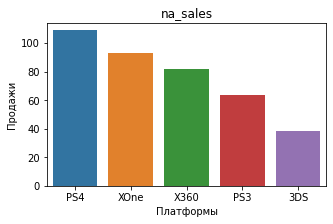

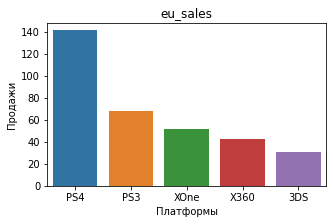

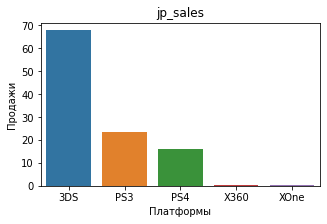

In [47]:
#Выведем топ по регионам
for name_reg_pl in ['na_sales','eu_sales','jp_sales']:
    func_region_platform(name_reg_pl, name_reg_pl)  

Топ 5 популярных платформ NA: PS4, XOne, X360, PS3, 3DS

Топ 5 популярных платформ EU: PS4, PS3, XOne, X360, 3DS

Топ 5 популярных платформ JP: 3DS, PS3, PS4, X360, XOne

В NA разрыв равномерный. В EU отрыв PS4 довольно большой. В JP большой отрыв 3DS. Так же JP выделяется тем, что на первом месте платформа DS, в то время, как в NA и EU она на 5м месте.

### Самые популярные жанры (топ-5). Поясните разницу.

In [48]:
#Напишем функцию для графиков жанров по регионам
def func_region_genre(region, title):
    platform_region_gen_pivot = data.pivot_table(index='genre', values = region, aggfunc='sum').sort_values(by=region, ascending=False)
    platform_region_gen_pivot = platform_region_gen_pivot.head()
    
    plt.figure(figsize=(5, 3))
    sns.barplot(x=platform_region_gen_pivot.index, y=platform_region_gen_pivot[region])
    plt.title(title)
    plt.xlabel('Платформы')
    plt.ylabel('Продажи')
    plt.show()

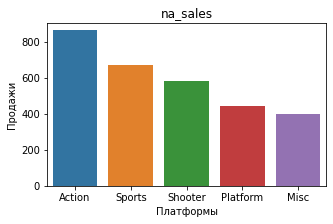

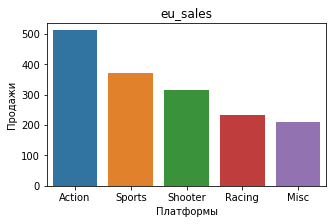

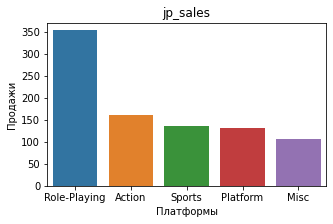

In [49]:
#Выведем топ по регионам
for name_reg_pl in ['na_sales','eu_sales','jp_sales']:
    func_region_genre(name_reg_pl, name_reg_pl)  

Топ 5 популярных жанров NA: action, sports, shooter, platform, misc

Топ 5 популярных жанров EU: action, sports, shooter, racing, misc

Топ 5 популярных жанров JP: role-playing, action, sports, platform, misc

В NA и EU идет плавное распределение игр по жанрам и топ 3 одинаковый. А вот в JP с большим отрывом на первом месте жанр role-playing, что обусловленно особым менталитетом японцев.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

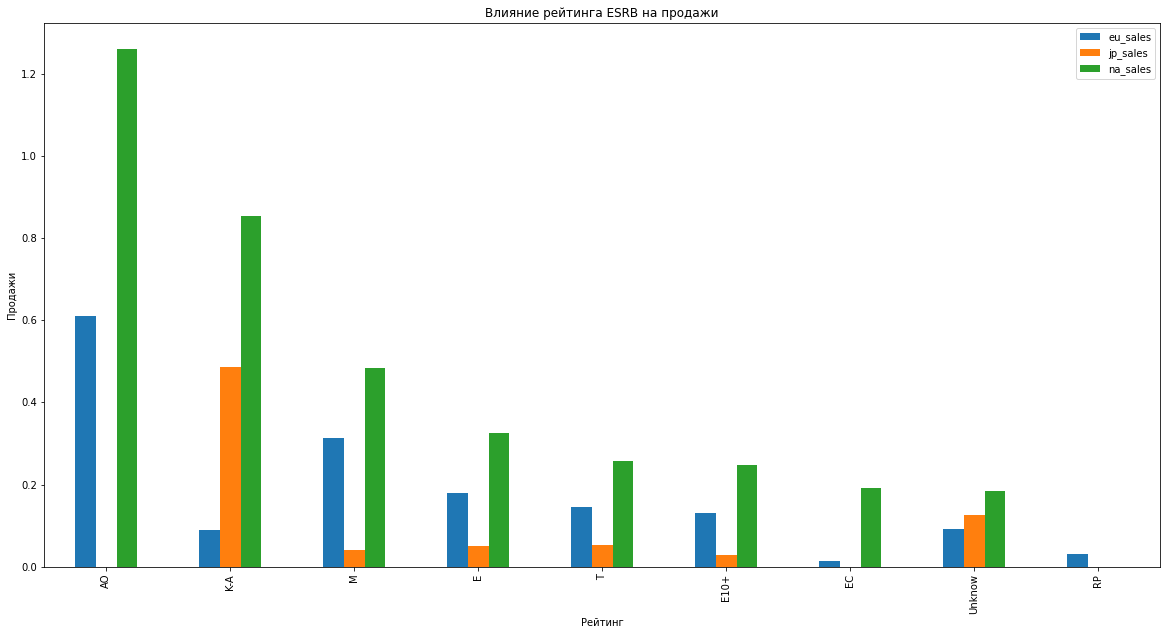

In [50]:
#Группируем таблицу
data_esrb = data.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='mean').sort_values(by='na_sales', ascending=False).plot(kind='bar', figsize=(20, 10))
#Строим гистограмму
plt.title('Влияние рейтинга ESRB на продажи')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.show()

Рейтинг ESRB предназначен для маркировки игр для США и Канады. И логично, что для других регионов, в нашем случае Японии, он не заполняется. Но есть по какой-то причине исключение рейтинг K-A (для всей аудитории). Самые большие продажи в EU и NA рейтингом игр 18+.

### Вывод

Топ 5 популярных платформ NA: NA: PS4, XOne, X360, PS3, 3DS. Топ 5 популярных платформ EU: PS4, PS3, XOne, X360, 3DS. Топ 5 популярных платформ JP: 3DS, PS3, PS4, X360, XOne. В NA разрыв равномерный. В EU отрыв PS4 довольно большой. В JP большой отрыв 3DS. Так же JP выделяется тем, что на первом месте платформа DS, в то время, как в NA и EU она на 5м месте.

Топ 5 популярных жанров NA: action, sports, shooter, platform, misc. Топ 5 популярных жанров EU: action, sports, shooter, racing, misc. Топ 5 популярных жанров JP: role-playing, action, sports, platform, misc. В NA и EU идет плавное распределение игр по жанрам и топ 3 одинаковый. А вот в JP с большим отрывом на первом месте жанр role-playing, что обусловленно особым менталитетом японцев.

Рейтинг ESRB предназначен для маркировки игр для США и Канады. И логично, что для других регионов, в нашем случае Японии, он не заполняется. Но есть по какой-то причине исключение рейтинг K-A (для всей аудитории). Самые большие продажи в EU и NA рейтингом игр 18+.

## Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам st.ttest_ind.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезу:
- H₀ = средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H₁ = средние пользовательские рейтинги платформ Xbox One и PC разные

In [51]:
#0я гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#Сделаем выборку и уберем нулевые значения, так как с ними p-значение будет равно nan
xboxone_test = data[(data['platform'] == 'XOne') & (data['year_of_release'] > 2012) & (data['user_score'].notna())]['user_score']
pc_test = data[(data['platform'] == 'PC') & (data['year_of_release'] > 2012) & (data['user_score'].notna())]['user_score']

xboxone_test.head()

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xboxone_test, 
    pc_test)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Следовательно средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем гипотезу:
- H₀ = средние пользовательские рейтинги жанров Action и Sports разные
- H₁ = средние пользовательские рейтинги жанров Action и Sports одинаковые

In [52]:
#0я гипотеза - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
#Сделаем выборку и уберем нулевые значения, так как с ними p-значение будет равно nan
action_test = data[(data['genre'] == 'Action') & (data['year_of_release'] > 2012) & (data['user_score'].notna())]['user_score']
sports_test = data[(data['genre'] == 'Sports') & (data['year_of_release'] > 2012) & (data['user_score'].notna())]['user_score']

xboxone_test.head()

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_test, 
    sports_test)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Следовательно средние пользовательские рейтинги жанров Action и Sports одинаковые.

## Общий вывод

1. До 1990 года количество игр выпускалось достаточно мало, их можно не брать в расчет. Настоящий бум наступил с 2000-х годов с развитием и доступностью компьютеров.

2. В среднем срок жизни платформы 10-11 лет.

3. Лидирующие платформы по продажам: X360, PS4, XOne, PS3, 3DS.

4. Влияние на продажи отзывов пользователей слабая, влияние на продажи отзывов критиков умеренная.

5. Больше всего жанров: Action - 521, Role-Playing - 184, Sports - 170. Но по сумме продаж топ 3 отличается: Shooter - медианна продаж 0.62, Sports - медианна продаж 0.36, Platform - 0,24. Меньше всего продаж у жанров Puzzle и Adventure. Разры между Shooter и Adventure очень велик.

6. По регионам топ 5 популярных платформ NA: NA: PS4, XOne, X360, PS3, 3DS. Топ 5 популярных платформ EU: PS4, PS3, XOne, X360, 3DS. Топ 5 популярных платформ JP: 3DS, PS3, PS4, X360, XOne. В NA разрыв равномерный. В EU отрыв PS4 довольно большой. В JP большой отрыв 3DS. Так же JP выделяется тем, что на первом месте платформа DS, в то время, как в NA и EU она на 5м месте.

7. По регионам топ 5 популярных жанров NA: action, sports, shooter, platform, misc. Топ 5 популярных жанров EU: action, sports, shooter, racing, misc. Топ 5 популярных жанров JP: role-playing, action, sports, platform, misc. В NA и EU идет плавное распределение игр по жанрам и топ 3 одинаковый. А вот в JP с большим отрывом на первом месте жанр role-playing, что обусловленно особым менталитетом японцев.

8. Рейтинг ESRB предназначен для маркировки игр для США и Канады. И логично, что для других регионов, в нашем случае Японии, он не заполняется. Но есть по какой-то причине исключение рейтинг K-A (для всей аудитории). Самые большие продажи в EU и NA рейтингом игр 18+.

9. Не получилось отвергуть нулевую гипотезу H₀ = средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Отвергли нулевую гипотезу H₀ = средние пользовательские рейтинги жанров Action и Sports разные.

## Итог
1. В Северной Америке необходмо запускать и продвигать игры на платфоре PS4 в жанрах action, sports и shooter с возрастным ограничением 18+.
2. В Европе необходмо запускать и продвигать игры на платфоре PS4 в жанрах action, sports и shooter с возрастным ограничением 18+.
3. В Японии необходмо запускать и продвигать игры на платфоре 3DS в жанре role-playing
4. Для Северной Америки и Европы необходио добиться положительных отзывов критиков.